In [14]:
#import packages
import pandas as pd
import numpy as np
import re as re
import os
import matplotlib as mil
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [15]:
root = "/Users/briangoggin/Dropbox/CP_213/Paper/"
data = root+"Raw Data/"

In [16]:
#import ridership data
import_path = root+"/Intermediate Data/"
ridership = pd.read_csv(import_path+"/ridership.csv")

In [17]:
ridership.head()

,Unnamed: 0,BART_sat,BART_sun,BART_wkdy,FV_sat,FV_sun,FV_wkdy,date
0,0,3549.455128,2356.134615,8235.398046,4429.750000,2851.50,7409.095238,January 2001
1,1,3554.179487,2351.384615,8586.797571,3945.750000,2813.25,7715.578947,February 2001
2,2,3768.830769,2358.884615,8718.501166,4415.000000,2680.25,7848.500000,March 2001
3,3,3691.129341,2420.851282,8558.831502,4791.965914,3227.20,8144.333333,April 2001
4,4,3947.570513,2955.083333,8560.191142,4877.500000,3573.50,8150.227273,May 2001


# Section 1. Fruitvale Ridership

In [18]:
#Next, create weighted average daily exits
ridership['w_average_FV'] = (5/7)*ridership['FV_wkdy'] + (1/7)*ridership['FV_sat'] + (1/7)*ridership['FV_sun']
ridership['w_average_BART'] = (5/7)*ridership['BART_wkdy'] + (1/7)*ridership['BART_sat'] + (1/7)*ridership['BART_sun']

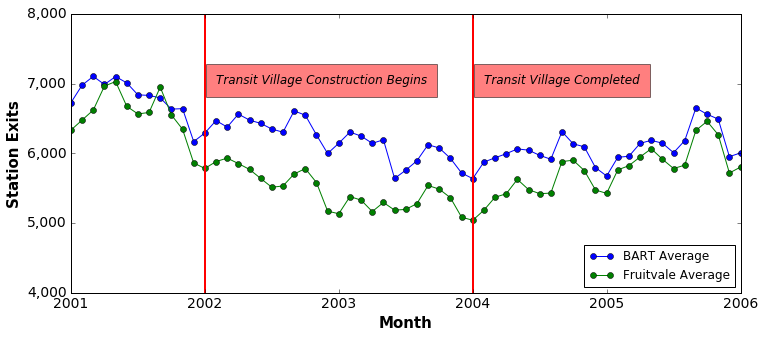

In [19]:
# Plot Monthly Daily Exits
fig, ax = plt.subplots(figsize=(12, 5))
#plt.title('Fruitvale Average Daily Exits',fontsize=16, fontweight='bold')
ax.set_xticks([0, 12, 24, 36, 48, 60])
ax.set_xticklabels(['2001', '2002', '2003', '2004', '2005', '2006'], rotation = 0, fontsize = 14)
ax.set_yticks([4000, 5000, 6000, 7000, 8000])
ax.set_yticklabels(['4,000', '5,000', '6,000', '7,000', '8,000'], rotation = 0, fontsize = 14)
plt.xlabel('Month',fontsize=15, fontweight='bold')
plt.ylabel('Station Exits',fontsize=15, fontweight='bold')
plt.xlim([0, 60])
plt.ylim([4000, 8000])
plt.plot(ridership['w_average_BART'], '-o', label = 'BART Average')
plt.plot(ridership['w_average_FV'], '-o', label = 'Fruitvale Average')
plt.axvline(x = 36, linewidth=2, color='r')
plt.text(37, 7000, 'Transit Village Completed', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10}, fontsize = 12)
plt.axvline(x = 12, linewidth=2, color='r')
plt.text(13, 7000, 'Transit Village Construction Begins', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10}, fontsize = 12)

ax.legend(loc=4)
export = root+"/Output/"
plt.savefig(export+"/fig5.png",dpi=200)

In [20]:
ridership['year'] = ridership['date'].str.split(' ').str[1].str.strip(']')

In [21]:
annual = ridership.groupby(['year'])[['w_average_FV','w_average_BART']].mean()

In [22]:
annual.head()

,w_average_FV,w_average_BART
year,,
2001,6579.129846,6817.196066
2002,5678.174259,6389.050956
2003,5286.179398,6014.021611
2004,5498.237164,5980.673407
2005,5943.448691,6157.721351


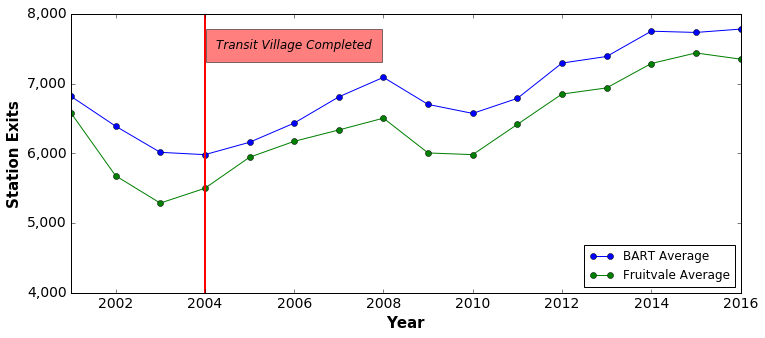

In [23]:
# Plot Annual Average Ridership
fig, ax = plt.subplots(figsize=(12, 5))
#plt.title('Fruitvale Average Annual Daily Exits',fontsize=20, fontweight='bold')
plt.xlabel('Year',fontsize=15, fontweight='bold')
plt.ylabel('Station Exits',fontsize=15, fontweight='bold')
ax.set_xticks([2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016])
ax.set_xticklabels(['2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016'], rotation = 0, fontsize = 14)
ax.set_yticks([4000, 5000, 6000, 7000, 8000])
ax.set_yticklabels(['4,000', '5,000', '6,000', '7,000', '8,000'], rotation = 0, fontsize = 14)
plt.xlim([2001, 2016])
plt.ylim([4000, 8000])
plt.plot(annual['w_average_BART'], '-o',  label = 'BART Average')
plt.plot(annual['w_average_FV'], '-o', label = 'Fruitvale Average')
plt.axvline(x = 2004, linewidth=2, color='r')
plt.text(2004.25, 7500, 'Transit Village Completed', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10}, fontsize = 12)
ax.legend(loc=4)
export = root+"/Output/"
plt.savefig(export+"/fig6.png",dpi=400)

In [24]:
# Percentage Change in Ridership
annual['difference'] = annual['w_average_FV'] - annual['w_average_BART']
annual.head(16)

,w_average_FV,w_average_BART,difference
year,,,
2001,6579.129846,6817.196066,-238.066220
2002,5678.174259,6389.050956,-710.876697
2003,5286.179398,6014.021611,-727.842213
2004,5498.237164,5980.673407,-482.436243
2005,5943.448691,6157.721351,-214.272660
2006,6171.442795,6432.725459,-261.282663
2007,6334.544406,6809.076330,-474.531925
2008,6503.833453,7089.202042,-585.368589
2009,6005.144423,6700.750546,-695.606123


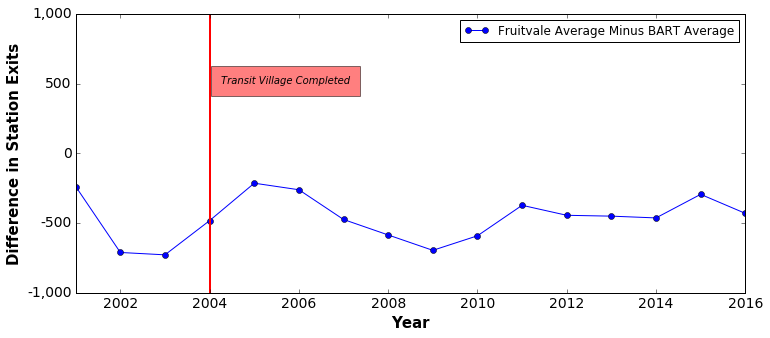

In [25]:
# Plot Difference in Annual Average Ridership
fig, ax = plt.subplots(figsize=(12, 5))
#plt.title('Fruitvale Annual Difference from Mean',fontsize=20, fontweight='bold')
plt.xlabel('Year',fontsize=15, fontweight='bold')
plt.ylabel('Difference in Station Exits',fontsize=15, fontweight='bold')
ax.set_xticks([2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016])
ax.set_xticklabels(['2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016'], rotation = 0, fontsize = 14)
ax.set_yticks([-1000, -500, 0, 500, 1000])
ax.set_yticklabels(['-1,000', '-500', '0', '500', '1,000'], rotation = 0, fontsize = 14)
plt.xlim([2001, 2016])
plt.ylim([-1000, 1000])
plt.plot(annual['difference'], '-o', label = 'Fruitvale Average Minus BART Average')
plt.axvline(x = 2004, linewidth=2, color='r')
plt.text(2004.25, 500, 'Transit Village Completed', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
ax.legend(loc=1)
export = root+"/Output/"
plt.savefig(export+"/fig7.png",dpi=400)

In [26]:
# Table of Differences
export = root+"/Output/"
annual.to_csv(export+"averages.csv")